<a href="https://colab.research.google.com/github/Pranav2612000/course.fast.ai/blob/main/lesson2/Laugh_Cry_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Preparing data

In [ ]:
!pip install duckduckgo_search
!pip install fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00


In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images = 30):
  print(f"Searching for '{term}'")
  return L(ddg_images(term, max_results = max_images)).itemgot('image')

In [ ]:
# Verify some results
urls_happy = search_images("happy person potrait", 5)
urls_sad = search_images("sad person potrait", 5)
urls_happy

Searching for 'happy person potrait'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


Searching for 'sad person potrait'


(#5) ['https://www.sott.net/image/s18/363461/full/584e656bc461887c2e8b4598.jpg','https://pluspng.com/img-png/our-smileys-for-your-business-because-happy-people-inspire-change-1042.png','https://www.1designshop.com/wp-content/uploads/2015/12/1dsp-20151212-002.png','https://www.lovepanky.com/wp-content/uploads/2019/10/How-to-Be-a-Happier-Person.jpg','https://the-happy-manager.com/wp-content/uploads/bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg']

In [ ]:
# Download and store into seperate folders
from time import sleep
from fastai.vision.all import *

categories = 'laughing', 'crying'
path = Path('happy_or_sad')

for o in categories:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls = search_images(f"{o} people potrait", 50))
  sleep(10)
  download_images(dest, urls = search_images(f"{o} people face", 50))
  sleep(10)
  download_images(dest, urls = search_images(f"{o} people headshot", 50))
  resize_images(path/o, max_size=400, dest=path/o)

Searching for 'laughing people potrait'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


Searching for 'laughing people face'
Searching for 'laughing people headshot'
Searching for 'crying people potrait'
Searching for 'crying people face'
Searching for 'crying people headshot'


In [ ]:
path = Path('happy_or_sad')

In [ ]:
!rm happy_or_sad/sad -rf

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

## Step 2: Training the models

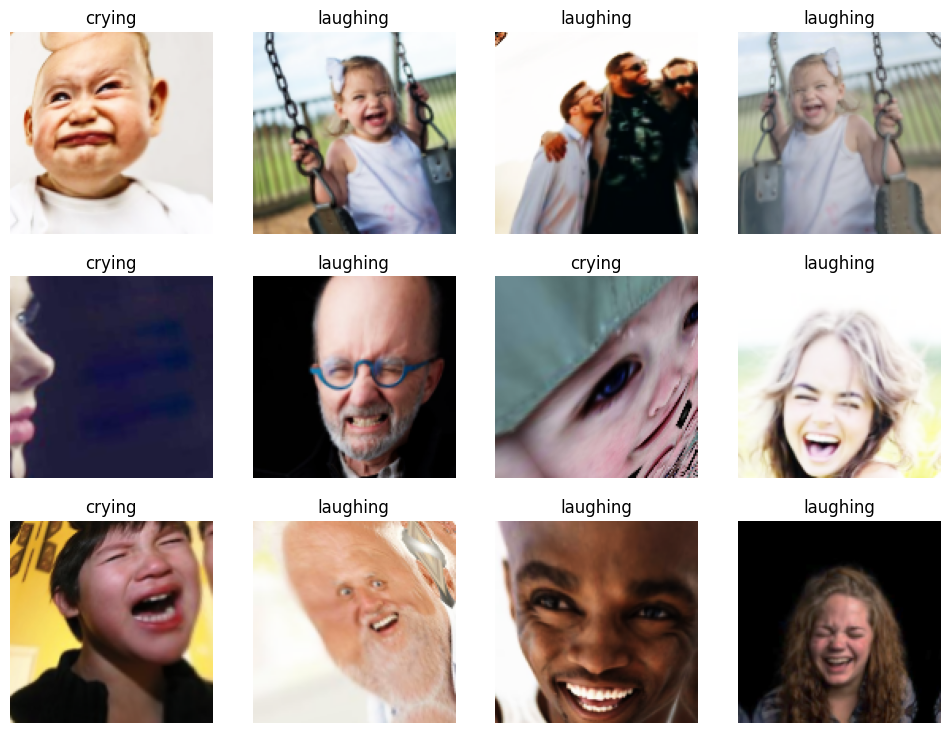

In [ ]:
faces = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]
)

faces = faces.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = faces.dataloaders(path)

dls.train.show_batch(max_n = 12)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

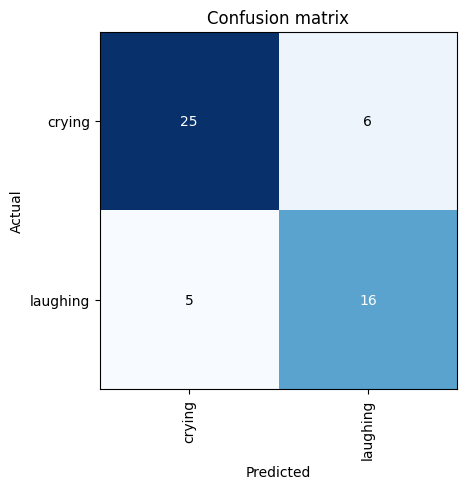

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

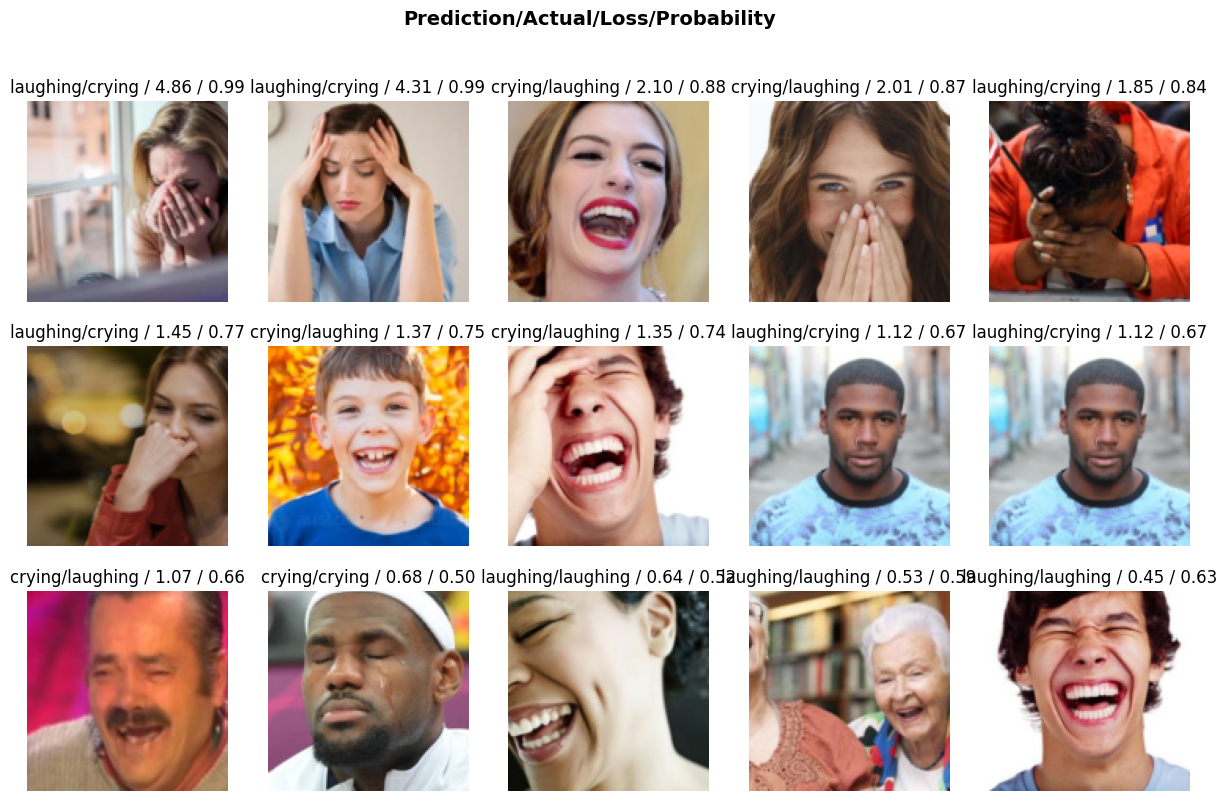

In [ ]:
interp.plot_top_losses(15, nrows=3)

In [ ]:
from fastai.vision.widgets import *

cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()


## Use the model

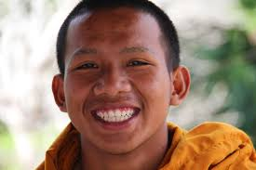

Category: crying
Probability: 0.8835


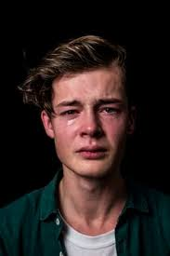

Category: crying
Probability: 0.9537


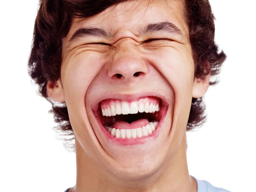

Category: laughing
Probability: 0.4913


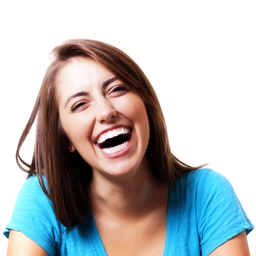

Category: laughing
Probability: 0.0611


In [ ]:
from fastdownload import download_url

test_images = [
  "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3IPCyGJbNRfANufNrWPaktVA2MGgM8FnoVA&usqp=CAU",
  "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTockAlyGjWM2uYh0nLuxqaz2a0kCkON94NhQ&usqp=CAU",
  "https://i.guim.co.uk/img/media/27c4787a15df036d85fa0fa8381bad39c2a55272/0_42_5296_3177/master/5296.jpg?width=1200&height=900&quality=85&auto=format&fit=crop&s=7c10c965cbaae51b2a55d48acfe76e0c",
  "https://alsnewstoday.com/wp-content/uploads/2018/06/laughter.jpg"
]

test_path = Path('testing_images')

test_path.mkdir(exist_ok=True, parents=True)

for [index, img_url] in enumerate(test_images):
  try:
    img_path = (test_path/(f'{index}.jpg'))
    download_url(img_url, img_path, show_progress=False)
    pred_cat, _, probs = learn.predict(PILImage.create(img_path))
    #Image.open(img_path).convert('L').save(img_path)
    img = Image.open(img_path).to_thumb(256, 256)
    display(img)
    print(f'Category: {pred_cat}')
    print(f'Probability: {probs[0]:.4f}')
  except e:
    print(e)
    print(f"Error with image at index {index}. Skipping...")

In [ ]:
learn.export()